In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:

#loading red wine quality dataset 
red_wine =  pd.read_csv('E:\Programming\VIT\Machine Learning\Rquirements\winequality-red.csv', sep=";")
#adding new feature for red wine
red_wine['type'] = 0

white_wine = pd.read_csv('E:\Programming\VIT\Machine Learning\Rquirements\winequality-white.csv', sep=";")
#adding new featur for white wine
white_wine['type'] = 1
print("Red wine headers")
print(f"Dataset shape: {red_wine.shape} - {red_wine.shape[0]} rows and {red_wine.shape[1]} columns")

print("White wine headers")
print(f"Dataset shape: {white_wine.shape} - {white_wine.shape[0]} rows and {white_wine.shape[1]} columns")




Red wine headers
Dataset shape: (1599, 13) - 1599 rows and 13 columns
White wine headers
Dataset shape: (4898, 13) - 4898 rows and 13 columns


In [4]:
# Check data types and missing values
print("Dataset information:")
white_wine.info()

# Get statistical summary of numerical features
print("\nSummary statistics of numerical features:")
white_wine.describe()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  type                  4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB

Summary statistics of numerical features:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.0
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,1.0
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.0
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,1.0
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,1.0
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.0
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.0
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.0


In [5]:
#handling inconsistency between datasets

#checking any columns are mismatching
print(set(red_wine.columns) - set(white_wine.columns))
#checking data types
print(red_wine.dtypes)
print(white_wine.dtypes)



set()
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                      int64
dtype: object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                      int64
dtype: object


In [6]:
# 1.1 Data Integration Challenge 
combined_dataset = pd.concat([red_wine, white_wine], ignore_index=True)
print(combined_dataset)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [7]:
#missing value simulation
# MCAR – 5% missing in citric_acid
np.random.seed(42)
mcar_indices = combined_dataset.sample(frac=0.05).index
combined_dataset.loc[mcar_indices, 'citric acid'] = np.nan

In [8]:
# MAR – 3% missing in sulphates where quality < 5
mar_condition = combined_dataset[combined_dataset['quality'] < 5]
mar_indices = mar_condition.sample(frac=0.03, random_state=42).index
combined_dataset.loc[mar_indices, 'sulphates'] = np.nan

print("checking missingness")
print(combined_dataset.isnull().sum())

checking missingness
fixed acidity             0
volatile acidity          0
citric acid             325
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 7
alcohol                   0
quality                   0
type                      0
dtype: int64


In [9]:
#imputation startergies
#mean imputation
mean_imputed = combined_dataset.copy()
mean_imputed['citric acid'] = mean_imputed['citric acid'].fillna(mean_imputed['citric acid'].mean())
mean_imputed['sulphates'] = mean_imputed['sulphates'].fillna(mean_imputed['sulphates'].mean())


In [10]:
#median imputation
median_imputed = combined_dataset.copy()
median_imputed['citric acid'] = median_imputed['citric acid'].fillna(median_imputed['citric acid'].median())
median_imputed['sulphates'] = median_imputed['sulphates'].fillna(median_imputed['sulphates'].median())


In [11]:
from sklearn.impute import KNNImputer


knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed = combined_dataset.copy()
# Only numeric columns for KNN
knn_imputed.iloc[:, :] = knn_imputer.fit_transform(knn_imputed)


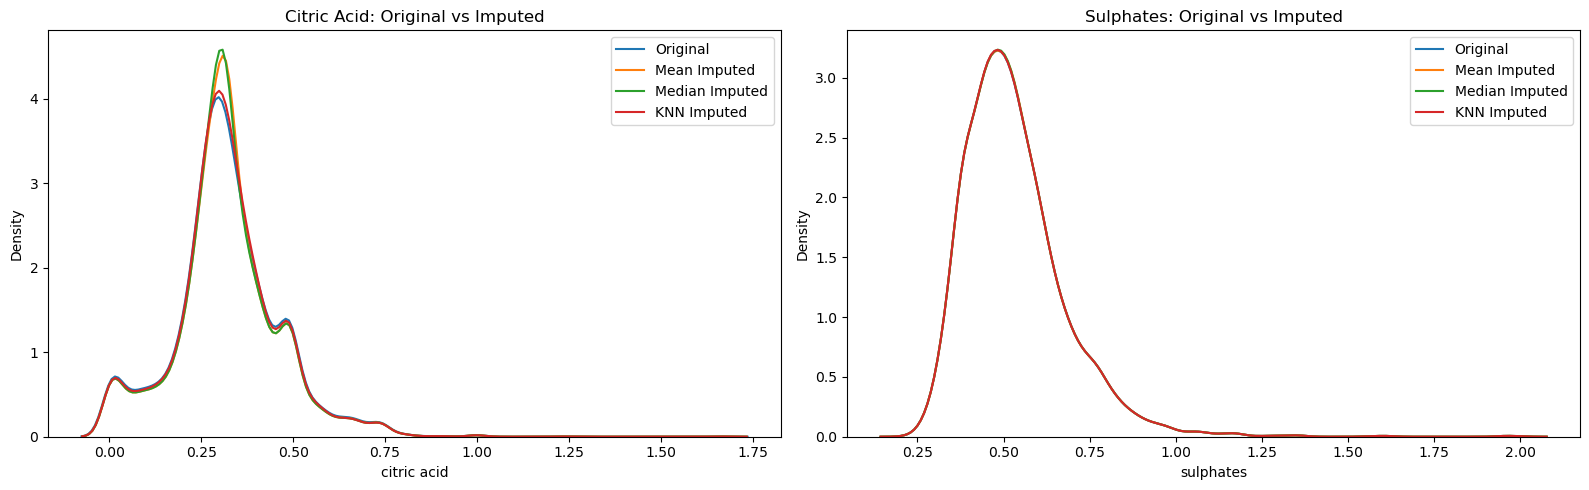

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# -------------------------
# Citric Acid Comparison
# -------------------------
sns.kdeplot(combined_dataset['citric acid'], label='Original', ax=axes[0])
sns.kdeplot(mean_imputed['citric acid'], label='Mean Imputed', ax=axes[0])
sns.kdeplot(median_imputed['citric acid'], label='Median Imputed', ax=axes[0])
sns.kdeplot(knn_imputed['citric acid'], label='KNN Imputed', ax=axes[0])
axes[0].set_title('Citric Acid: Original vs Imputed')
axes[0].set_xlabel('citric acid')
axes[0].legend()

# -------------------------
# Sulphates Comparison
# -------------------------
sns.kdeplot(combined_dataset['sulphates'], label='Original', ax=axes[1])
sns.kdeplot(mean_imputed['sulphates'], label='Mean Imputed', ax=axes[1])
sns.kdeplot(median_imputed['sulphates'], label='Median Imputed', ax=axes[1])
sns.kdeplot(knn_imputed['sulphates'], label='KNN Imputed', ax=axes[1])
axes[1].set_title('Sulphates: Original vs Imputed')
axes[1].set_xlabel('sulphates')
axes[1].legend()

plt.tight_layout()
plt.show()

In [13]:
#creating three new engineered features
combined_dataset['acid_ratio'] = combined_dataset['fixed acidity'] / combined_dataset['volatile acidity']
combined_dataset['sulfur_ratio'] = combined_dataset['free sulfur dioxide'] / combined_dataset['total sulfur dioxide']
combined_dataset['alcohol_sugar_interaction'] = combined_dataset['alcohol'] * combined_dataset['residual sugar']
combined_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,acid_ratio,sulfur_ratio,alcohol_sugar_interaction
count,6497.000000,6497.000000,6172.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6490.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318671,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531277,10.491801,5.818378,0.753886,25.338136,0.286768,55.070088
std,1.296434,0.164636,0.145651,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148865,1.192712,0.873255,0.430779,10.734173,0.124645,45.643541
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,4.807692,0.022727,6.360000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000,17.692308,0.202073,19.040000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000,24.000000,0.269767,33.020000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000,31.052632,0.348837,82.140000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,90.000000,0.857143,769.860000


In [14]:
X = combined_dataset.drop('quality', axis=1)
y = combined_dataset['quality']

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scalers = {
    'Standard': StandardScaler(),
    'MinMax': MinMaxScaler(),
    'Robust': RobustScaler()
}

X_scaled = {name: scaler.fit_transform(X) for name, scaler in scalers.items()}


In [16]:
from sklearn.neighbors import KNeighborsClassifier



# Step 4: Scale data and train KNN
results = {}

for name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(knn_imputed)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Step 5: Print results
for name, acc in results.items():
    print(f"{name} Scaler Accuracy: {acc:.4f}")


Standard Scaler Accuracy: 0.9238
MinMax Scaler Accuracy: 0.9738
Robust Scaler Accuracy: 0.9362


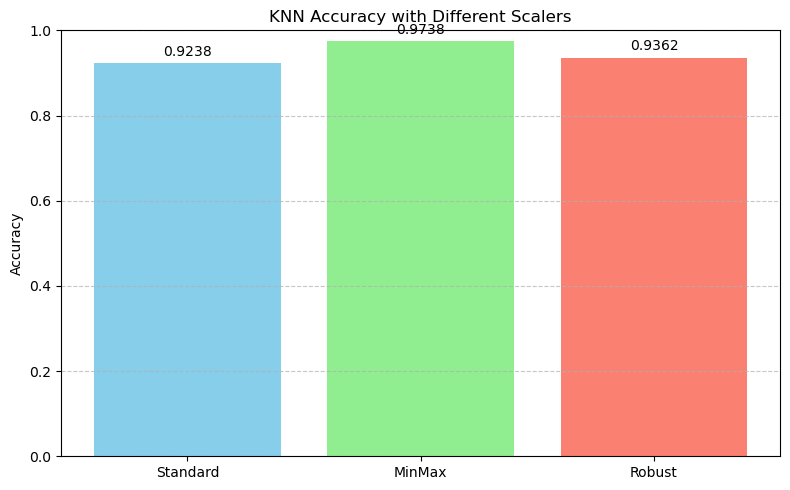

In [17]:
#Comparing the performance of different scalers using KNN
import matplotlib.pyplot as plt

# Use the 'results' dictionary from previous step
scaler_names = list(results.keys())
# Take the mean accuracy for each scaler
accuracies = [np.mean(acc_list) for acc_list in results.values()]

plt.figure(figsize=(8, 5))
bars = plt.bar(scaler_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('KNN Accuracy with Different Scalers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


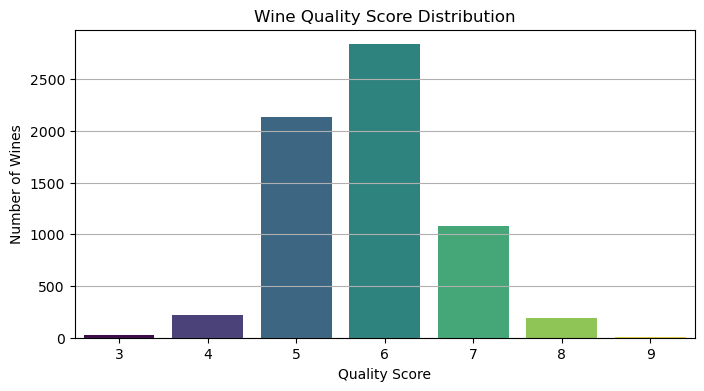

In [18]:
#  1. Analyze Quality Distribution (Is it balanced?)
import matplotlib.pyplot as plt
import seaborn as sns

# Count of quality scores
plt.figure(figsize=(8, 4))
sns.countplot(x='quality', hue='quality', data=combined_dataset, palette='viridis', legend=False)
plt.title("Wine Quality Score Distribution")
plt.xlabel("Quality Score")
plt.ylabel("Number of Wines")
plt.grid(axis='y')
plt.show()

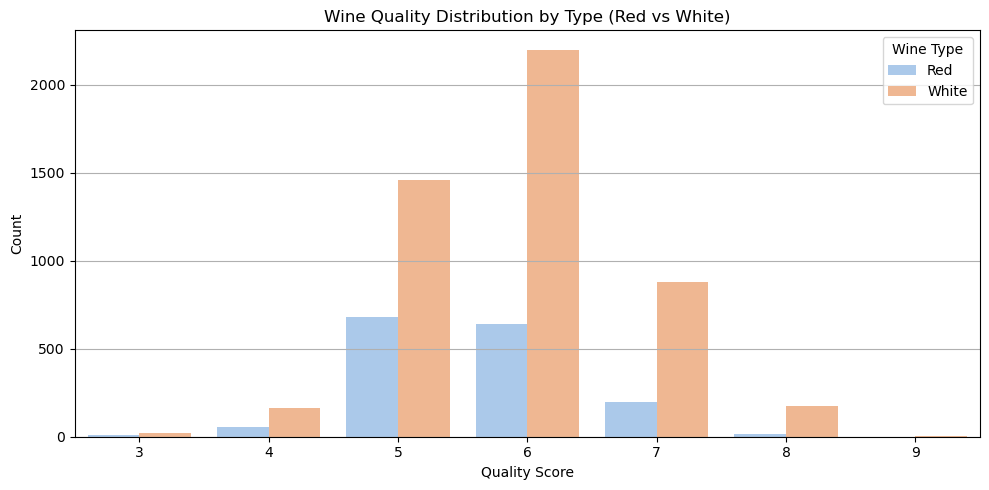

In [19]:
# 2. Quality Distribution by Wine Type
plt.figure(figsize=(10, 5))
sns.countplot(data=combined_dataset, x='quality', hue='type', palette='pastel')
plt.title('Wine Quality Distribution by Type (Red vs White)')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.legend(title='Wine Type', labels=['Red', 'White'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

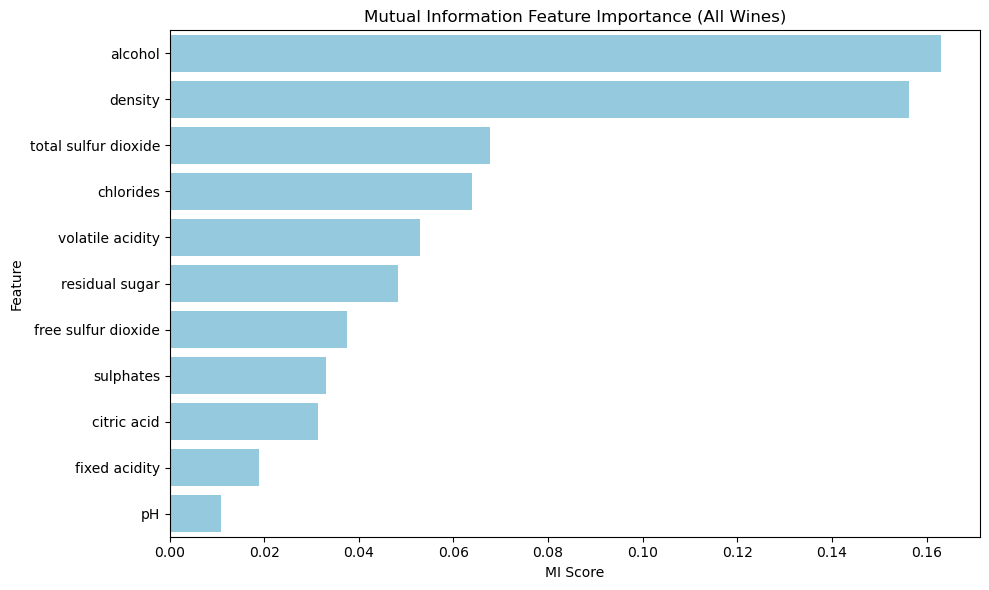

In [20]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'mean_imputed' is your clean dataset with 'quality' as the target
# Drop non-feature columns
X = mean_imputed.drop(columns=['quality', 'type'])  # keep only numerical features
y = mean_imputed['quality']

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create DataFrame for visualization
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df, x='MI Score', y='Feature', color='skyblue')
plt.title('Mutual Information Feature Importance (All Wines)')
plt.tight_layout()
plt.show()


In [21]:
#Challenge: How do outliers affect KNN? Demonstrate with examples. 
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset by wine type
red_wine = mean_imputed[mean_imputed['type'] == 0]
white_wine = mean_imputed[mean_imputed['type'] == 1]

# Define features and target
X_red = red_wine.drop(columns=['quality', 'type'])
y_red = red_wine['quality']

X_white = white_wine.drop(columns=['quality', 'type'])
y_white = white_wine['quality']

# Compute mutual information for each
mi_red = mutual_info_classif(X_red, y_red, random_state=42)
mi_white = mutual_info_classif(X_white, y_white, random_state=42)

# Create DataFrames
mi_red_df = pd.DataFrame({'Feature': X_red.columns, 'MI Score': mi_red, 'Wine Type': 'Red'})
mi_white_df = pd.DataFrame({'Feature': X_white.columns, 'MI Score': mi_white, 'Wine Type': 'White'})

# Combine both
mi_combined = pd.concat([mi_red_df, mi_white_df])
mi_combined.sort_values(by='MI Score', ascending=False, inplace=True)


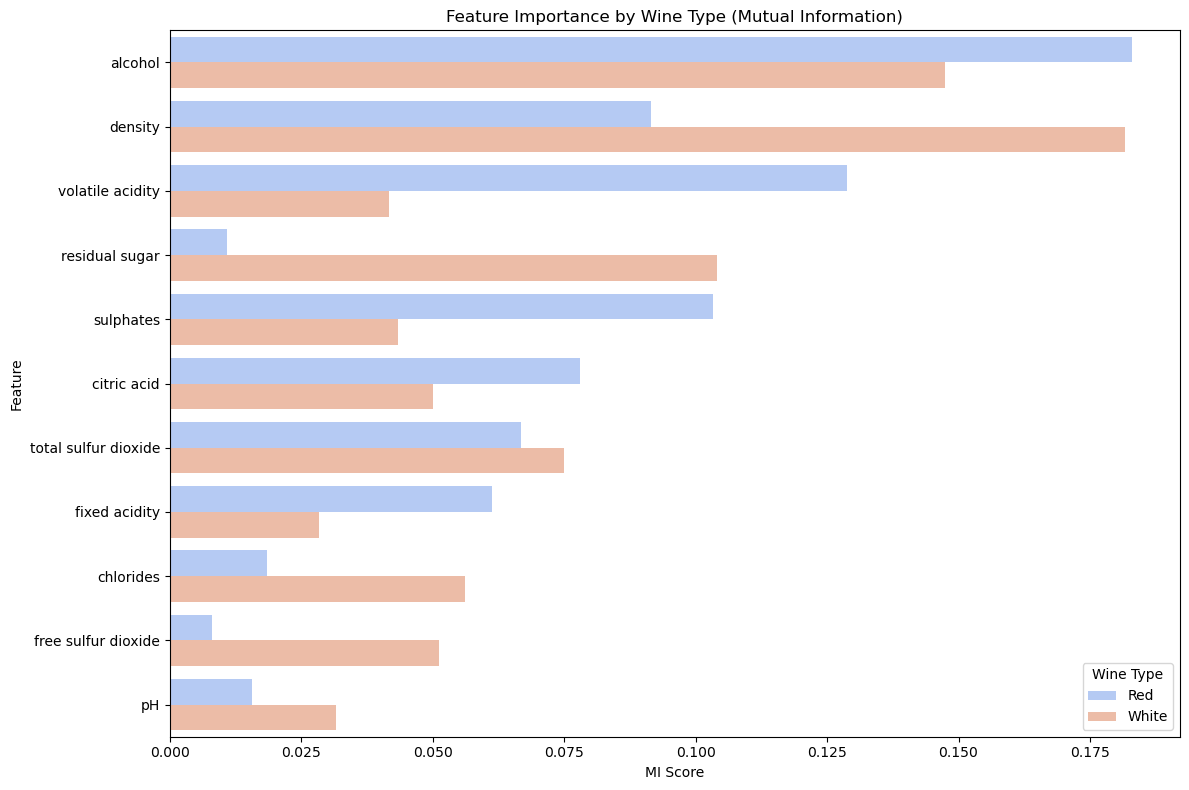

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(data=mi_combined, x='MI Score', y='Feature', hue='Wine Type', palette='coolwarm')
plt.title('Feature Importance by Wine Type (Mutual Information)')
plt.tight_layout()
plt.show()


In [23]:
# Phase 3: Model Development & Evaluation
# Implement stratified sampling to maintain quality distribution 

from sklearn.model_selection import train_test_split

# Define features and target
X = mean_imputed.drop(columns=['quality'])
y = mean_imputed['quality']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,       # this ensures proportional distribution
    random_state=42
)


In [24]:
import pandas as pd

# Check target distribution
print("Original distribution:\n", y.value_counts(normalize=True).sort_index())
print("\nTrain distribution:\n", y_train.value_counts(normalize=True).sort_index())
print("\nTest distribution:\n", y_test.value_counts(normalize=True).sort_index())


Original distribution:
 quality
3    0.004618
4    0.033246
5    0.329075
6    0.436509
7    0.166077
8    0.029706
9    0.000770
Name: proportion, dtype: float64

Train distribution:
 quality
3    0.004618
4    0.033288
5    0.329036
6    0.436598
7    0.166057
8    0.029632
9    0.000770
Name: proportion, dtype: float64

Test distribution:
 quality
3    0.004615
4    0.033077
5    0.329231
6    0.436154
7    0.166154
8    0.030000
9    0.000769
Name: proportion, dtype: float64


In [25]:
# Use 70-15-15 split (train-validation-test) 
from sklearn.model_selection import train_test_split

# Full features and target
X = mean_imputed.drop(columns=['quality'])
y = mean_imputed['quality']

# Remove classes with only 1 sample (required for stratified split)
value_counts = y.value_counts()
valid_classes = value_counts[value_counts > 1].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

# Step 1: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

# Step 2: Validation (15%) and Test (15%) from Temp
# Remove classes with only 1 sample in y_temp (very rare, but safe)
temp_value_counts = y_temp.value_counts()
temp_valid_classes = temp_value_counts[temp_value_counts > 1].index
X_temp = X_temp[y_temp.isin(temp_valid_classes)]
y_temp = y_temp[y_temp.isin(temp_valid_classes)]

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,  # 0.5 * 30% = 15%
    stratify=y_temp,
    random_state=42
)


In [26]:
print("Original:", y.value_counts(normalize=True).sort_index())
print("Train   :", y_train.value_counts(normalize=True).sort_index())
print("Val     :", y_val.value_counts(normalize=True).sort_index())
print("Test    :", y_test.value_counts(normalize=True).sort_index())


Original: quality
3    0.004618
4    0.033246
5    0.329075
6    0.436509
7    0.166077
8    0.029706
9    0.000770
Name: proportion, dtype: float64
Train   : quality
3    0.004618
4    0.033209
5    0.329008
6    0.436552
7    0.166044
8    0.029690
9    0.000880
Name: proportion, dtype: float64
Val     : quality
3    0.005133
4    0.032854
5    0.329569
6    0.436345
7    0.166324
8    0.029774
Name: proportion, dtype: float64
Test    : quality
3    0.004103
4    0.033846
5    0.329231
6    0.436923
7    0.166154
8    0.029744
Name: proportion, dtype: float64


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, root_mean_squared_error
import numpy as np

# Use the stratified 70-15-15 split created earlier:
# X_train, X_val, X_test, y_train, y_val, y_test

# Train KNN with k=3 (Euclidean is the default distance metric)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on validation set
y_pred = knn.predict(X_val)
# Classification metrics
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred, average='weighted', zero_division=0)
rec = recall_score(y_val, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)

# Regression-style metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = root_mean_squared_error(y_val, y_pred)

# Print results
print("KNN Evaluation Metrics (k=3):")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"MAE            : {mae:.4f}")
print(f"RMSE           : {rmse:.4f}")


KNN Evaluation Metrics (k=3):
Accuracy       : 0.4784
Precision      : 0.4818
Recall         : 0.4784
F1 Score       : 0.4736
MAE            : 0.6622
RMSE           : 1.0005


In [28]:
# 3.3 Advanced Evaluation 
# • Implement custom evaluation metric: Quality-Weighted Accuracy 
import numpy as np

def quality_weighted_accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    correct_within_1 = np.abs(y_true - y_pred) <= 1
    return np.mean(correct_within_1)

# Apply to validation set predictions
qwa = quality_weighted_accuracy(y_val, y_pred)
print(f"Quality-Weighted Accuracy (±1): {qwa:.4f}")


Quality-Weighted Accuracy (±1): 0.8819


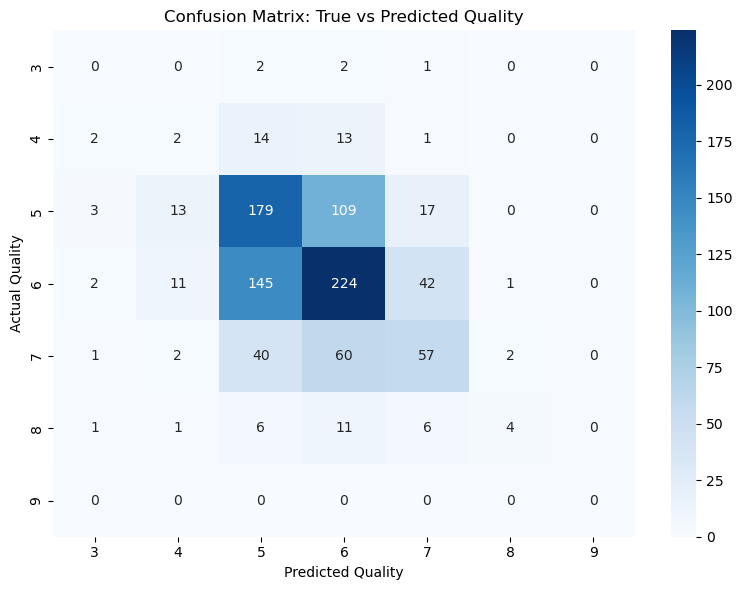

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred, labels=sorted(y.unique()))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title("Confusion Matrix: True vs Predicted Quality")
plt.xlabel("Predicted Quality")
plt.ylabel("Actual Quality")
plt.tight_layout()
plt.show()


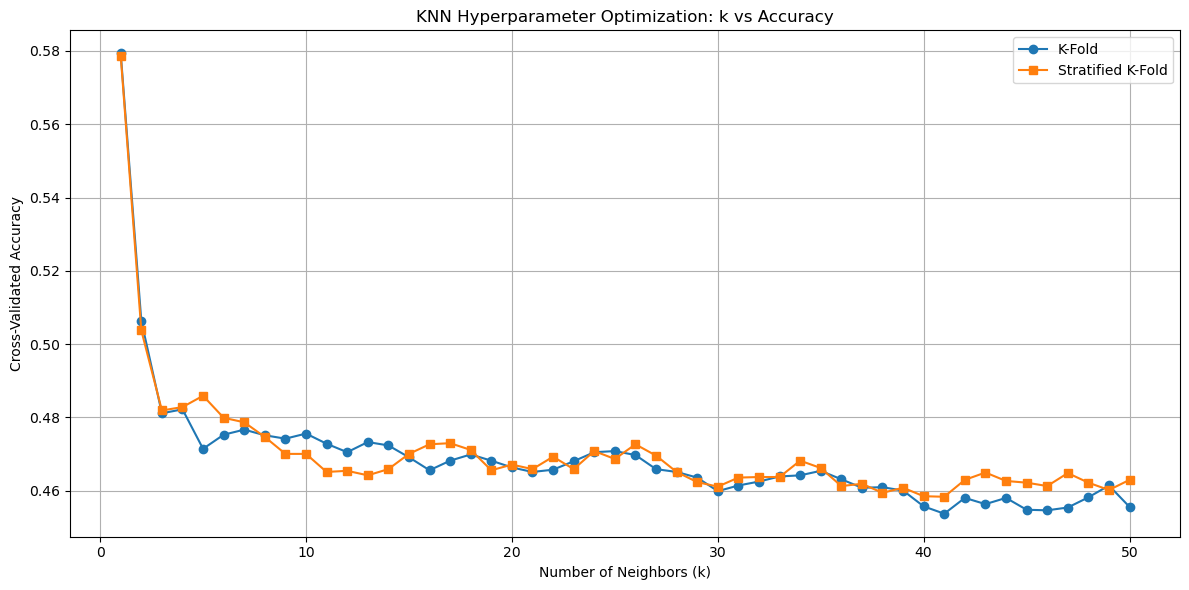

Best k (K-Fold): 1 | Accuracy: 0.5793
Best k (Stratified K-Fold): 1 | Accuracy: 0.5787


In [30]:
# Phase 4: Hyperparameter Optimization 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

import matplotlib.pyplot as plt

# Use the mean_imputed dataset and features/target as before
X = mean_imputed.drop(columns=['quality'])
y = mean_imputed['quality']

# Range of k values to test
k_range = range(1, 51)

# Prepare results storage
cv_results = {
    'KFold': [],
    'StratifiedKFold': []
}

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
    cv_results['KFold'].append(scores.mean())

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=skf, scoring='accuracy')
    cv_results['StratifiedKFold'].append(scores.mean())

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(k_range, cv_results['KFold'], label='K-Fold', marker='o')
plt.plot(k_range, cv_results['StratifiedKFold'], label='Stratified K-Fold', marker='s')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Optimization: k vs Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Find optimal k for each strategy
best_k_kfold = np.argmax(cv_results['KFold']) + 1
best_k_stratkfold = np.argmax(cv_results['StratifiedKFold']) + 1
print(f"Best k (K-Fold): {best_k_kfold} | Accuracy: {cv_results['KFold'][best_k_kfold-1]:.4f}")
print(f"Best k (Stratified K-Fold): {best_k_stratkfold} | Accuracy: {cv_results['StratifiedKFold'][best_k_stratkfold-1]:.4f}")

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Use the same train/val split as before
# X_train, X_val, y_train, y_val are already defined

# Distance metrics to compare
distance_metrics = {
    'Euclidean': {'metric': 'euclidean'},
    'Manhattan': {'metric': 'manhattan'},
    'Minkowski (p=3)': {'metric': 'minkowski', 'p': 3}
}

results_dist = {}

for name, params in distance_metrics.items():
    knn = KNeighborsClassifier(n_neighbors=5, **params)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)
    results_dist[name] = {'accuracy': acc, 'f1': f1}

# Advanced: Weighted distance based on feature importance (Mutual Information)
# Use MI scores from mi_df (already computed)
# Ensure only features present in X_train are used (exclude 'type' if not present)
mi_scores_aligned = mi_df.set_index('Feature').reindex(X_train.columns)['MI Score'].fillna(0).values
# Normalize MI scores to sum to 1, then invert so higher MI = lower weight (closer)
feature_weights = 1 / (mi_scores_aligned + 1e-6)
feature_weights /= feature_weights.sum()

from scipy.spatial.distance import minkowski

def weighted_minkowski(u, v, w, p=2):
    # u, v: 1D arrays; w: 1D array of weights
    return np.power(np.sum(w * np.abs(u - v) ** p), 1/p)

# Closure to pass weights and p to the distance function
def weighted_minkowski_distance(w, p):
    def dist(u, v):
        return weighted_minkowski(u, v, w, p)
    return dist

# Create the classifier with the custom metric
knn_weighted = KNeighborsClassifier(
    n_neighbors=5,
    metric=weighted_minkowski_distance(feature_weights, 2)
)
knn_weighted.fit(X_train, y_train)
y_pred_weighted = knn_weighted.predict(X_val)
acc_weighted = accuracy_score(y_val, y_pred_weighted)
f1_weighted = f1_score(y_val, y_pred_weighted, average='weighted', zero_division=0)
results_dist['Weighted Euclidean (MI)'] = {'accuracy': acc_weighted, 'f1': f1_weighted}

# Display results
for name, scores in results_dist.items():
    print(f"{name}: Accuracy = {scores['accuracy']:.4f}, F1 = {scores['f1']:.4f}")

Euclidean: Accuracy = 0.4713, F1 = 0.4574
Manhattan: Accuracy = 0.4928, F1 = 0.4781
Minkowski (p=3): Accuracy = 0.4682, F1 = 0.4522
Weighted Euclidean (MI): Accuracy = 0.4589, F1 = 0.4421


In [32]:
# 4.3 Advanced KNN Variants 
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, LocalOutlierFactor
from sklearn.metrics import accuracy_score, f1_score

# Weighted KNN (distance-based weights)
knn_weighted_dist = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_weighted_dist.fit(X_train, y_train)
y_pred_weighted_dist = knn_weighted_dist.predict(X_val)
acc_weighted_dist = accuracy_score(y_val, y_pred_weighted_dist)
f1_weighted_dist = f1_score(y_val, y_pred_weighted_dist, average='weighted', zero_division=0)

# Radius-based neighbors
radius_clf = RadiusNeighborsClassifier(radius=2.0, weights='distance', outlier_label='most_frequent')
radius_clf.fit(X_train, y_train)
y_pred_radius = radius_clf.predict(X_val)
acc_radius = accuracy_score(y_val, y_pred_radius)
f1_radius = f1_score(y_val, y_pred_radius, average='weighted', zero_division=0)

# Local Outlier Factor (for outlier detection, not classification)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outlier_flags = lof.fit_predict(X_train)
n_outliers = (outlier_flags == -1).sum()

print(f"Weighted KNN (distance): Accuracy = {acc_weighted_dist:.4f}, F1 = {f1_weighted_dist:.4f}")
print(f"RadiusNeighborsClassifier: Accuracy = {acc_radius:.4f}, F1 = {f1_radius:.4f}")
print(f"Local Outlier Factor: Outliers detected in training set = {n_outliers}")

Weighted KNN (distance): Accuracy = 0.5811, F1 = 0.5748
RadiusNeighborsClassifier: Accuracy = 0.5883, F1 = 0.5687
Local Outlier Factor: Outliers detected in training set = 228


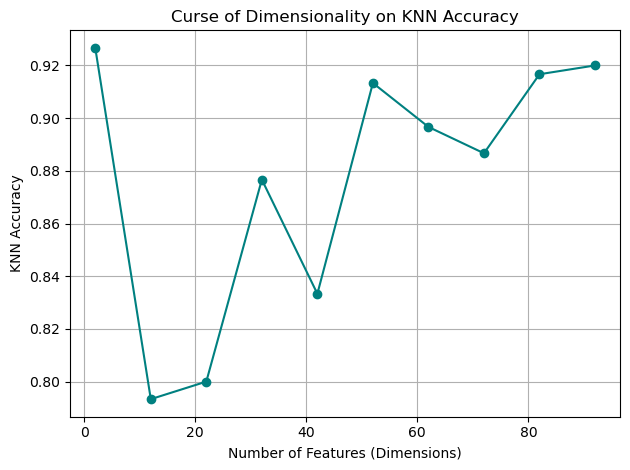

In [33]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

dims = range(2, 101, 10)  # from 2 to 100 dimensions
accuracies = []

for d in dims:
    n_informative = max(2, d // 5)  # Keep informative features low (e.g., 20% of d)
    
    X, y = make_classification(
        n_samples=1000,
        n_features=d,
        n_informative=n_informative,
        n_redundant=0,
        n_repeated=0,
        random_state=42
    )
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the drop in accuracy
plt.plot(dims, accuracies, marker='o', color='teal')
plt.xlabel("Number of Features (Dimensions)")
plt.ylabel("KNN Accuracy")
plt.title("Curse of Dimensionality on KNN Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


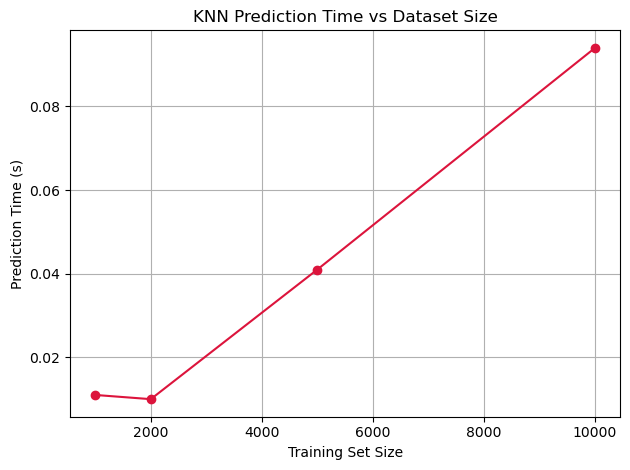

In [34]:
import time
import numpy as np

sample_sizes = [1000, 2000, 5000, 10000]
times = []

for n in sample_sizes:
    X, y = make_classification(n_samples=n, n_features=20, n_informative=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    start = time.time()
    knn.predict(X_test)
    end = time.time()
    
    times.append(end - start)

plt.plot(sample_sizes, times, marker='o', color='crimson')
plt.xlabel("Training Set Size")
plt.ylabel("Prediction Time (s)")
plt.title("KNN Prediction Time vs Dataset Size")
plt.grid()
plt.tight_layout()
plt.show()


In [35]:
import numpy as np

n_samples = 10000
n_features = 20
dtype_size = 8  # float64

memory_MB = (n_samples * n_features * dtype_size) / (1024 ** 2)
print(f"Estimated memory usage for training data: {memory_MB:.2f} MB")


Estimated memory usage for training data: 1.53 MB


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import time

# Reuse stratified train/val/test splits (assumes X, y already defined)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, stratify=y_train_val, random_state=42)  # 0.176 ≈ 15% of total

results = {}

# -------------------- KNN --------------------
start_train = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
train_time = time.time() - start_train

start_pred = time.time()
y_pred_knn = knn.predict(X_val)
pred_time = time.time() - start_pred

results['KNN'] = {
    'accuracy': accuracy_score(y_val, y_pred_knn),
    'f1_score': f1_score(y_val, y_pred_knn, average='weighted'),
    'train_time': train_time,
    'pred_time': pred_time
}

# -------------------- Random Forest --------------------
start_train = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
train_time = time.time() - start_train

start_pred = time.time()
y_pred_rf = rf.predict(X_val)
pred_time = time.time() - start_pred

results['Random Forest'] = {
    'accuracy': accuracy_score(y_val, y_pred_rf),
    'f1_score': f1_score(y_val, y_pred_rf, average='weighted'),
    'train_time': train_time,
    'pred_time': pred_time
}

# -------------------- Print Results --------------------
for model, metrics in results.items():
    print(f"\n{model} Performance:")
    for metric, value in metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")



KNN Performance:
Accuracy: 0.9378
F1_score: 0.9378
Train_time: 0.0020
Pred_time: 0.0680

Random Forest Performance:
Accuracy: 0.9164
F1_score: 0.9164
Train_time: 4.1474
Pred_time: 0.0407


In [37]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Example dataset (replace with your own)
# X should be a DataFrame; y should be a Series or array
# If X is a NumPy array, define feature names manually
feature_names = X.columns.tolist() if isinstance(X, pd.DataFrame) else [f'feature_{i}' for i in range(X.shape[1])]
if isinstance(X, np.ndarray):
    X_df = pd.DataFrame(X, columns=feature_names)
else:
    X_df = X.copy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42, stratify=y)

# ----------- Feature Selection -----------
# SelectKBest (ANOVA F-test)
skb = SelectKBest(score_func=f_classif, k=10)
X_train_skb = skb.fit_transform(X_train, y_train)
X_test_skb = skb.transform(X_test)
selected_features_skb = [feature_names[i] for i in skb.get_support(indices=True)]

# RFE with Logistic Regression
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
selected_features_rfe = [feature_names[i] for i in rfe.get_support(indices=True)]

print("Top 10 features by SelectKBest:", selected_features_skb)
print("Top 10 features by RFE:", selected_features_rfe)

# ----------- Train and Evaluate KNN -----------
knn = KNeighborsClassifier(n_neighbors=5)

# Evaluate on SelectKBest features
knn.fit(X_train_skb, y_train)
y_pred_skb = knn.predict(X_test_skb)
acc_skb = accuracy_score(y_test, y_pred_skb)

# Evaluate on RFE features
knn.fit(X_train_rfe, y_train)
y_pred_rfe = knn.predict(X_test_rfe)
acc_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"KNN Accuracy with SelectKBest features: {acc_skb:.4f}")
print(f"KNN Accuracy with RFE features: {acc_rfe:.4f}")


Top 10 features by SelectKBest: ['feature_3', 'feature_4', 'feature_7', 'feature_8', 'feature_10', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17']
Top 10 features by RFE: ['feature_1', 'feature_3', 'feature_7', 'feature_8', 'feature_11', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17']
KNN Accuracy with SelectKBest features: 0.9100
KNN Accuracy with RFE features: 0.9330


In [38]:

import numpy as np
from sklearn.metrics import pairwise_distances

# Define weights (should align with feature order in X)
feature_weights = np.array([1.0, 2.0, 1.2, 1.5, 1.0, 1.2, 1.5, 0.8, 0.8, 2.0, 3.0])  # Example for 11 features

def custom_distance(u, v):
    return np.sqrt(np.sum(feature_weights * (u - v) ** 2))


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume X and y are already preprocessed
# Select only the first 11 features to match feature_weights
X_selected = X[:, :11]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, stratify=y, random_state=42)

knn_custom = KNeighborsClassifier(n_neighbors=3, metric=custom_distance)
knn_custom.fit(X_train, y_train)
y_pred = knn_custom.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy with custom distance: {acc:.4f}")


Accuracy with custom distance: 0.7804


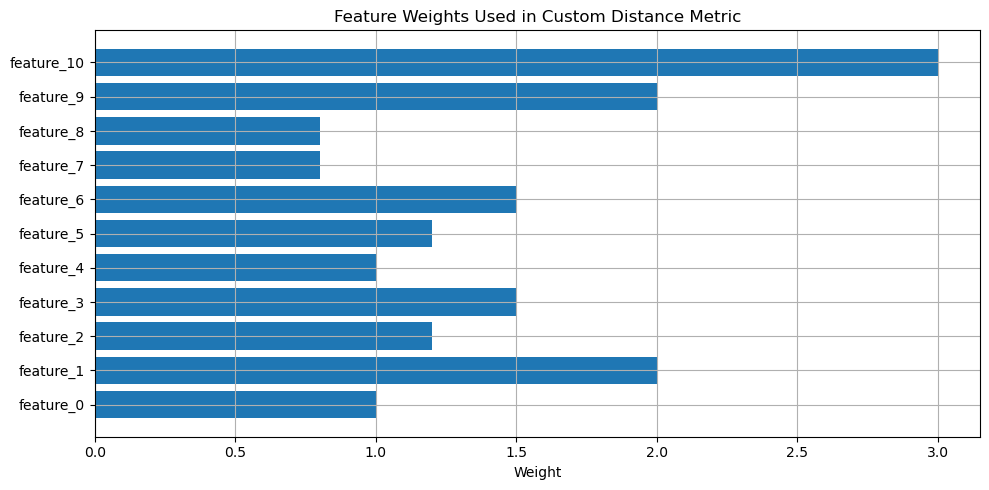

In [42]:
import matplotlib.pyplot as plt

features = X.columns if hasattr(X, 'columns') else [f"feature_{i}" for i in range(len(feature_weights))]

plt.figure(figsize=(10, 5))
plt.barh(features, feature_weights)
plt.title("Feature Weights Used in Custom Distance Metric")
plt.xlabel("Weight")
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume combined_dataset is preprocessed and features/labels are ready
# For example:
# X = combined_dataset.drop('quality', axis=1)
# y = combined_dataset['quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define feature subsets (example: select different indexes)
feature_sets = [
    list(range(0, X.shape[1])),                  # All features
    list(range(0, X.shape[1] // 2)),             # First half
    list(range(X.shape[1] // 2, X.shape[1]))     # Second half
]

# Define models with different parameters
knn1 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn2 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn3 = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=3)

# Wrap KNNs with feature selection
from sklearn.base import BaseEstimator, ClassifierMixin

class FeatureSubsetKNN(BaseEstimator, ClassifierMixin):
    def __init__(self, knn, features):
        self.knn = knn
        self.features = features

    def fit(self, X, y):
        self.knn.fit(X[:, self.features], y)
        return self

    def predict(self, X):
        return self.knn.predict(X[:, self.features])

# Build wrapped classifiers
model1 = ('knn1', FeatureSubsetKNN(knn1, feature_sets[0]))
model2 = ('knn2', FeatureSubsetKNN(knn2, feature_sets[1]))
model3 = ('knn3', FeatureSubsetKNN(knn3, feature_sets[2]))

# Ensemble using soft voting
ensemble = VotingClassifier(
    estimators=[model1, model2, model3],
    voting='hard'  # Use 'soft' if using predict_proba
)

# Fit ensemble
ensemble.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = ensemble.predict(X_test_scaled)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Ensemble Accuracy: 0.8815
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1000
           1       0.89      0.87      0.88      1000

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load & prepare data
X = combined_dataset.drop('quality', axis=1)
y = combined_dataset['quality']

# Impute missing values with mean (or use median/0 as needed)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split for streaming and test
X_stream, X_test, y_stream, y_test = train_test_split(
    X_imputed, y, test_size=0.2, stratify=y, random_state=42
)

# Scale
scaler = StandardScaler()
X_stream_scaled = scaler.fit_transform(X_stream)
X_test_scaled = scaler.transform(X_test)

# Simulate streaming (in chunks)
n_chunks = 10
chunk_size = len(X_stream_scaled) // n_chunks
model = SGDClassifier(loss='log_loss', max_iter=1, warm_start=True)

accuracies = []

for i in range(n_chunks):
    start = i * chunk_size
    end = start + chunk_size
    X_chunk = X_stream_scaled[start:end]
    y_chunk = y_stream.iloc[start:end]

    # Simulate concept drift
    if i >= n_chunks // 2:
        y_chunk = y_chunk.apply(lambda q: q - 1 if q >= 7 else q)

    # Incremental training
    model.partial_fit(X_chunk, y_chunk, classes=np.unique(y))

    # Evaluate on fixed test set
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Batch {i+1}: Accuracy = {acc:.4f}")


Batch 1: Accuracy = 0.4031
Batch 2: Accuracy = 0.4023
Batch 3: Accuracy = 0.3815
Batch 4: Accuracy = 0.3900
Batch 5: Accuracy = 0.4346
Batch 6: Accuracy = 0.4900
Batch 7: Accuracy = 0.4569
Batch 8: Accuracy = 0.4808
Batch 9: Accuracy = 0.4877
Batch 10: Accuracy = 0.4500
